In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

# Iris dataset

In [2]:
iris = load_iris()  # Load data from sklearn
X = iris.data
y = iris.target

## Looking at the data

## Preparing the data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
scaler = StandardScaler()
scaler.fit(X_train)     # We fit it on X_train, the data "we can see"
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train).long()
y_test = torch.tensor(y_test).long()

# Define the network

In [14]:
model = torch.nn.Sequential(
    torch.nn.Linear(4, 256),     # 4 inputs
    torch.nn.ReLU(),            # Non-linear activation
    torch.nn.Linear(256, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 3),     # 3 outputs, one for each possible category
    torch.nn.Softmax(dim=1)     # Returns the probability to be in each category
    )

optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, momentum=0.9)

In [7]:
loss_fn = torch.nn.CrossEntropyLoss()

# Training

In [8]:
def train(X_train, X_test, y_train, y_test,
          model, optimizer, loss_fn, epochs):
    
    accuracy_train_list = []
    accuracy_test_list = []
    
    for i in range(epochs):
        
        # Our classic syntax to update the weights
        
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Determining the error
        
        with torch.no_grad():

            # Train accuracy
            y_pred = model(X_train)  # Make prediction for the test dataset
            correct = \
                (torch.argmax(y_pred, dim=1) == y_train).type(torch.FloatTensor)
            accuracy_train_list.append(correct.mean())

            # Test accuracy
            y_pred = model(X_test)  # Make prediction for the train dataset
            correct = \
                (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
            accuracy_test_list.append(correct.mean())
    
    return accuracy_train_list, accuracy_test_list

In [15]:
acc_train, acc_test = train(X_train, X_test, y_train, y_test,
                            model, optimizer, loss_fn, 10000)

# Plot

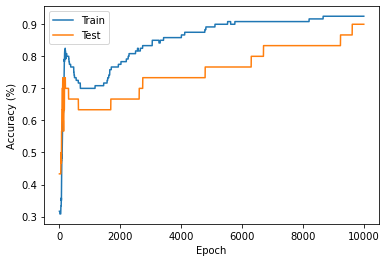

In [16]:
fig1, ax1 = plt.subplots()
ax1.plot(acc_train, label='Train')
ax1.plot(acc_test, label='Test')
ax1.set(xlabel='Epoch', ylabel='Accuracy (%)')
ax1.legend()
plt.show()